## Project #1


```
Alexander Baquiax, Sergio Meoño
PIO | Econometría II
```

Video explicativo [https://youtu.be/KC3ESgfplsU](https://youtu.be/KC3ESgfplsU?t=1)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [345]:
colum_names=['price', 'quality', '1st_floor_square_feet', "rooms", "built_year", "lotfrontage"]
raw = np.load('data/data.npy')

In [346]:
dataset = pd.DataFrame(raw, columns=colum_names)
dataset.head().append(dataset.tail())

,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
1455,175000.0,6.0,953.0,7.0,1999.0,62.0
1456,210000.0,6.0,2073.0,7.0,1978.0,85.0
1457,266500.0,7.0,1188.0,9.0,1941.0,66.0
1458,142125.0,5.0,1078.0,5.0,1950.0,68.0
1459,147500.0,5.0,1256.0,6.0,1965.0,75.0


In [347]:
trainging_set_size = int(len(dataset) * 0.8)
trainging_set_size

1168

In [348]:
training_set = pd.DataFrame(dataset.values[:int(trainging_set_size)], columns=colum_names)
training_set.head().append(training_set.tail())


,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0
1163,108959.0,4.0,1258.0,6.0,1969.0,60.0
1164,194000.0,5.0,1432.0,5.0,1978.0,NaN
1165,233170.0,7.0,1502.0,7.0,2009.0,79.0
1166,245350.0,8.0,1694.0,7.0,2008.0,64.0
1167,173000.0,6.0,959.0,7.0,2000.0,58.0


In [349]:
testing_set = pd.DataFrame(dataset.values[trainging_set_size:], columns=colum_names)
testing_set.head().append(testing_set.tail())

,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
0,235000.0,6.0,1236.0,7.0,1935.0,120.0
1,625000.0,10.0,1831.0,10.0,1995.0,118.0
2,171000.0,6.0,1118.0,6.0,1977.0,76.0
3,163000.0,6.0,1261.0,6.0,1958.0,76.0
4,171900.0,7.0,625.0,5.0,2006.0,35.0
287,175000.0,6.0,953.0,7.0,1999.0,62.0
288,210000.0,6.0,2073.0,7.0,1978.0,85.0
289,266500.0,7.0,1188.0,9.0,1941.0,66.0
290,142125.0,5.0,1078.0,5.0,1950.0,68.0
291,147500.0,5.0,1256.0,6.0,1965.0,75.0


In [350]:
dataset.describe()

,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


In [351]:
dataset.dtypes

price                    float64
quality                  float64
1st_floor_square_feet    float64
rooms                    float64
built_year               float64
lotfrontage              float64
dtype: object

In [352]:
data = []
for colname in dataset.columns:
    column = dataset[colname]
    column_range = column.max() - column.min()
    data.append([colname, column.mean(), column.max(), column.min(), column_range, column.std()])

result = pd.DataFrame(data, columns=['variable', 'mean', 'max', 'min', 'range', 'std'])

result.head(6)
    

,variable,mean,max,min,range,std
0,price,180921.195890,755000.0,34900.0,720100.0,79442.502883
1,quality,6.099315,10.0,1.0,9.0,1.382997
2,1st_floor_square_feet,1162.626712,4692.0,334.0,4358.0,386.587738
3,rooms,6.517808,14.0,2.0,12.0,1.625393
4,built_year,1971.267808,2010.0,1872.0,138.0,30.202904
5,lotfrontage,70.049958,313.0,21.0,292.0,24.284752


### 4. Histogramas


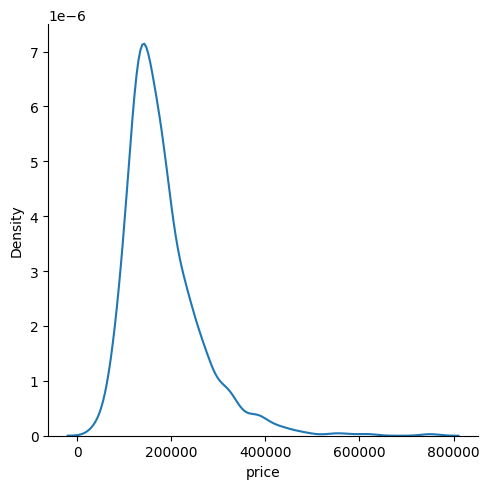

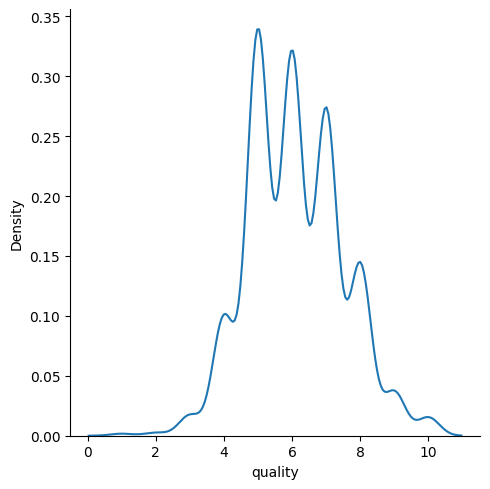

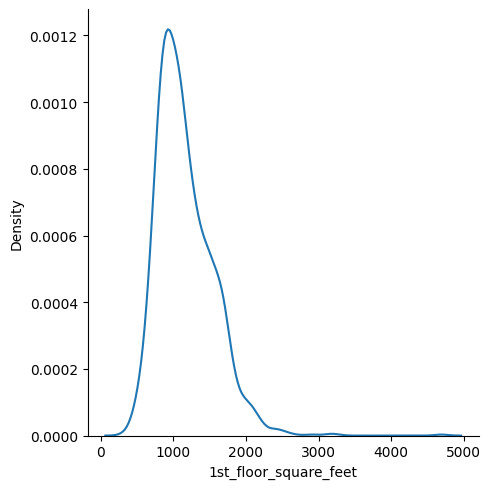

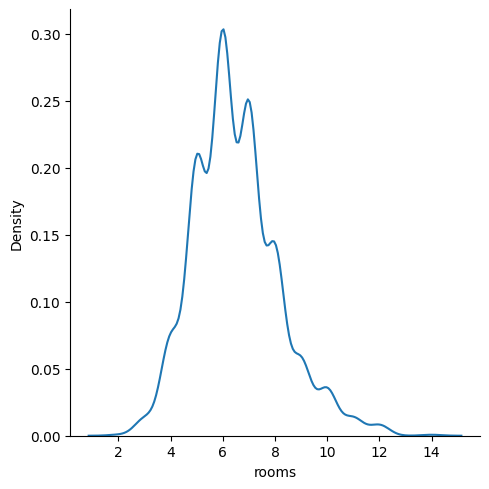

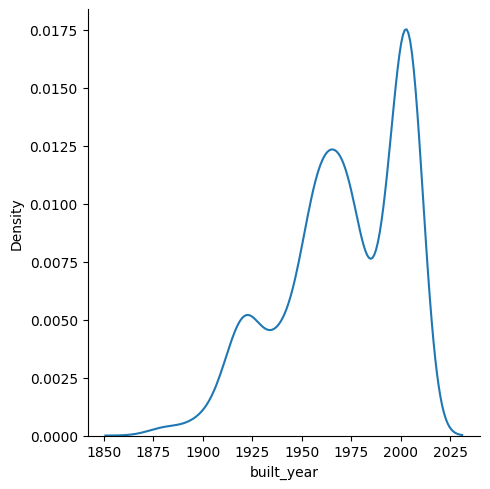

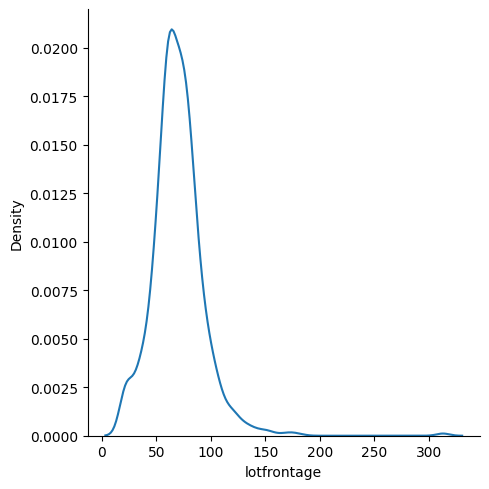

In [353]:
### 4. Histogramas
import seaborn as sns 

for colname in dataset.columns:
    sns.displot(dataset[colname],kind="kde")

### 5. Correlaciones

In [354]:
correlation = dataset.corr(method='pearson')
correlation


,price,quality,1st_floor_square_feet,rooms,built_year,lotfrontage
price,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
quality,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1st_floor_square_feet,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
rooms,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
built_year,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
lotfrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


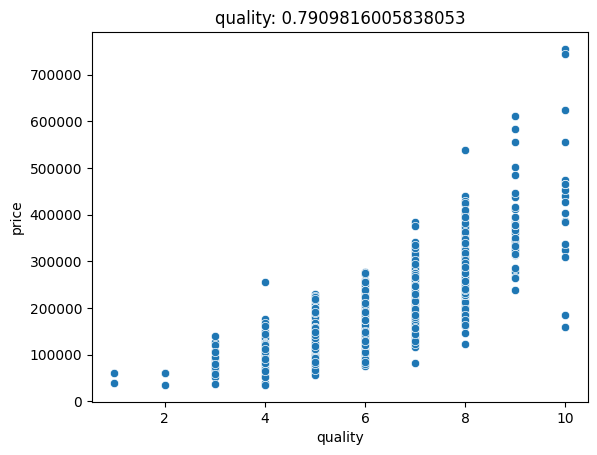

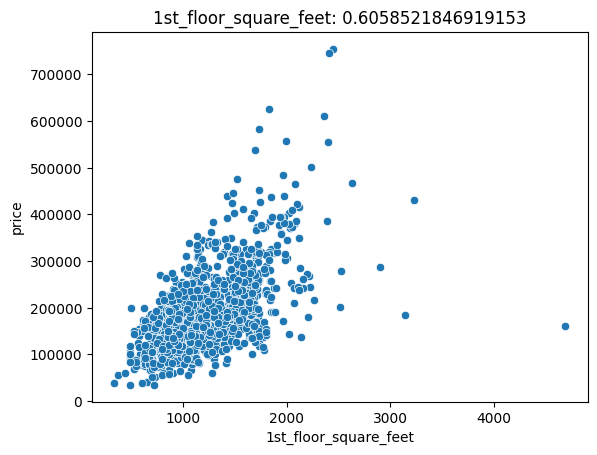

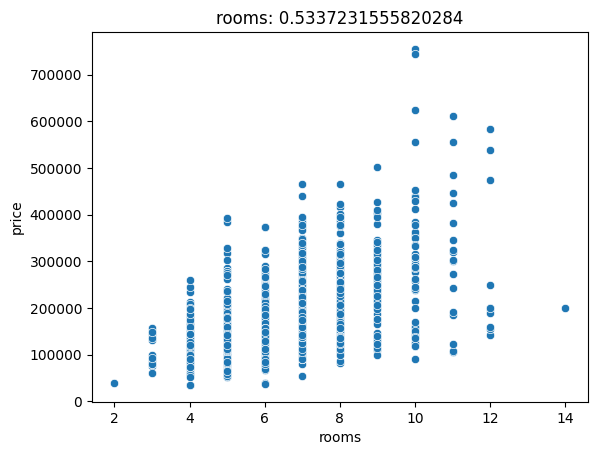

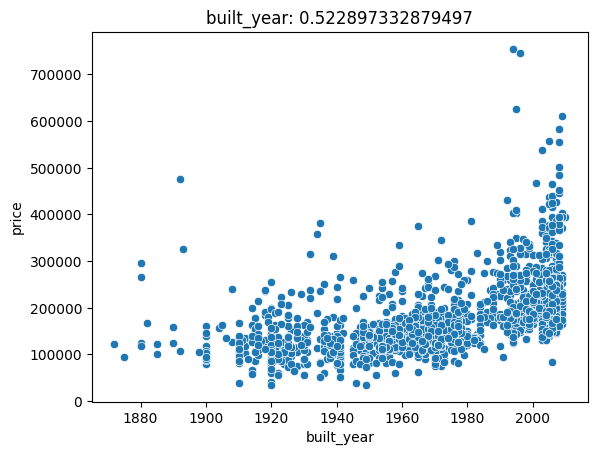

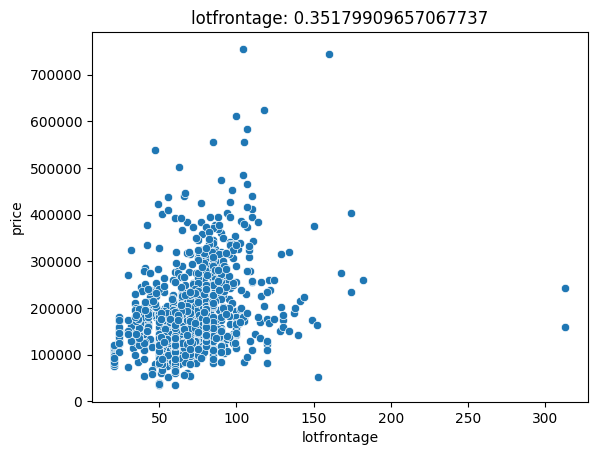

In [355]:
for colname in dataset.columns:
    if colname == "price":
        continue
    
    plt.figure()
    sns.scatterplot(data=dataset, x=colname, y="price").set_title(f"{colname}: {correlation['price'][colname]}")

Pareciera que las dos variables con mayor correlación son: `quality` y `1st_floor_square_feet`. `quality` tiene sentido ya que todos valoramos más una casa respecto a su calidad, y `1st_floor_square_feet` también tiene sentido ya que entre más grande sea la casa, más valor le damos. Y el tercero es el numero de cuartos `rooms` que eligiremos como segunda variable.

### 6. Regresiones 

#### Modelo manual

In [356]:
def train_model(x = np.array([]), y = np.array([]), epochs = 0, learning_rate = 1.0, print_every = 1):
    all_betas = []
    all_errors = []


    n = len(x)

    b0 = 0.0
    b1 = 0.0
    e = 0.0
    
    for epoch in range(1, epochs + 1):
        y_predicted = b0 + b1 * x

        # MSE
        e = ((y - y_predicted) ** 2) / 2*n

        all_errors.append(e.sum())
        all_betas.append([b0, b1])

        gradient_b0 = (y_predicted - y) / n
        gradient_b1 = ((y_predicted - y) * x) / n

        error_change = "+" if e.sum() < all_errors[-1] else "-"

        if epoch % print_every == 0:
            print(f"#{epoch} => b0: {b0:.4f}, b1: {b1:.4f}, error: {e.sum():.6E}, error_change:{error_change}")

        b0 = b0 - (learning_rate * gradient_b0.sum())
        b1 = b1 - (learning_rate * gradient_b1.sum())

    return np.array(all_betas), np.array(all_errors)


In [357]:
def plot_error_history(errors = np.array([])):
    plt.plot(errors)
    plt.xlabel("epochs")
    plt.ylabel("error")

In [358]:
def plot_model(b0 = 0, b1 = 0, color = "black", xlabel = "", ylabel = ""):
    x =  np.linspace(0, 10, 100)
    y = b0 + b1 * x
    
    plt.plot(x, y, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
def plot_model_history(all_betas = np.array([]), plot_every=1, xlabel = "", ylabel = ""):
    for i in range(0, len(all_betas), plot_every):
        b0 = all_betas[i][0]
        b1 = all_betas[i][1]

        plot_model(b0, b1, color="black", xlabel=xlabel, ylabel=ylabel)

    plot_model(all_betas[-1][0], all_betas[-1][1], color="red", xlabel=xlabel, ylabel=ylabel)


Prueba de nuestro modelador

In [359]:
result = train_model(np.array([1, 2, 3, 4, 5, 6, 7]), np.array([1, 4, 9, 16, 25, 36, 49]), 14000, 0.001, 100)

#100 => b0: 0.7005, b1: 4.7397, error: 1.338510E+03, error_change:-
#200 => b0: 0.5745, b1: 5.3758, error: 1.074639E+03, error_change:-
#300 => b0: 0.3492, b1: 5.4958, error: 1.041844E+03, error_change:-
#400 => b0: 0.1158, b1: 5.5521, error: 1.013585E+03, error_change:-
#500 => b0: -0.1147, b1: 5.5997, error: 9.864407E+02, error_change:-
#600 => b0: -0.3410, b1: 5.6455, error: 9.603211E+02, error_change:-
#700 => b0: -0.5630, b1: 5.6904, error: 9.351868E+02, error_change:-
#800 => b0: -0.7808, b1: 5.7344, error: 9.110006E+02, error_change:-
#900 => b0: -0.9944, b1: 5.7775, error: 8.877267E+02, error_change:-
#1000 => b0: -1.2040, b1: 5.8198, error: 8.653307E+02, error_change:-
#1100 => b0: -1.4095, b1: 5.8614, error: 8.437795E+02, error_change:-
#1200 => b0: -1.6112, b1: 5.9021, error: 8.230413E+02, error_change:-
#1300 => b0: -1.8090, b1: 5.9420, error: 8.030853E+02, error_change:-
#1400 => b0: -2.0031, b1: 5.9812, error: 7.838821E+02, error_change:-
#1500 => b0: -2.1934, b1: 6.0197,

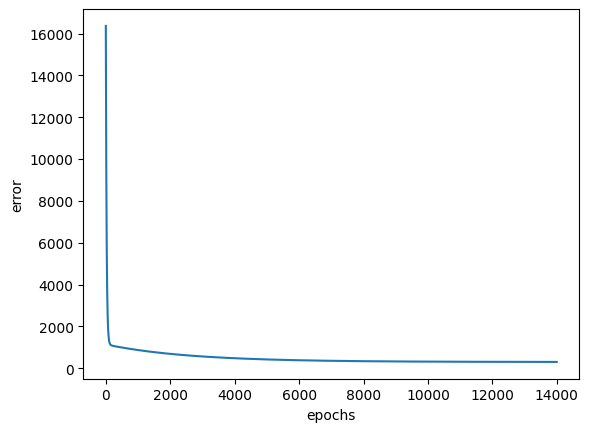

In [360]:
plot_error_history(result[1])

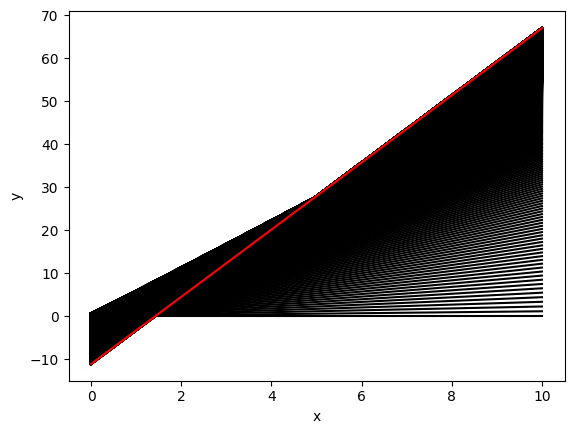

In [361]:
plot_model_history(result[0], 1, "x", "y")

In [372]:
def test_models(manual = np.array([0 , 0]), sklearn = np.array([0, 0]), x = np.array([])):
    ## manual
    y1 = manual[0] + manual[1] * x

    ## sklearn
    y2 = sklearn[0] + sklearn[1] * x

    ## avg
    y3 = (y1 + y2) / 2

    return {
        "manual": y1, 
        "sklearn": y2, 
        "avg": y3
    }

#### Uso del modelo manual

##### `quality` vs `price`

#5000 => b0: -95582.6197, b1: 45273.5046, error: 1.564677E+15, error_change:-
#10000 => b0: -96461.7971, b1: 45410.7849, error: 1.564651E+15, error_change:-
#15000 => b0: -96469.5032, b1: 45411.9881, error: 1.564651E+15, error_change:-
#20000 => b0: -96469.5707, b1: 45411.9987, error: 1.564651E+15, error_change:-
#25000 => b0: -96469.5713, b1: 45411.9988, error: 1.564651E+15, error_change:-
#30000 => b0: -96469.5713, b1: 45411.9988, error: 1.564651E+15, error_change:-
#35000 => b0: -96469.5713, b1: 45411.9988, error: 1.564651E+15, error_change:-
#40000 => b0: -96469.5713, b1: 45411.9988, error: 1.564651E+15, error_change:-
#45000 => b0: -96469.5713, b1: 45411.9988, error: 1.564651E+15, error_change:-
#50000 => b0: -96469.5713, b1: 45411.9988, error: 1.564651E+15, error_change:-
#55000 => b0: -96469.5713, b1: 45411.9988, error: 1.564651E+15, error_change:-
#60000 => b0: -96469.5713, b1: 45411.9988, error: 1.564651E+15, error_change:-
#65000 => b0: -96469.5713, b1: 45411.9988, error: 1.5

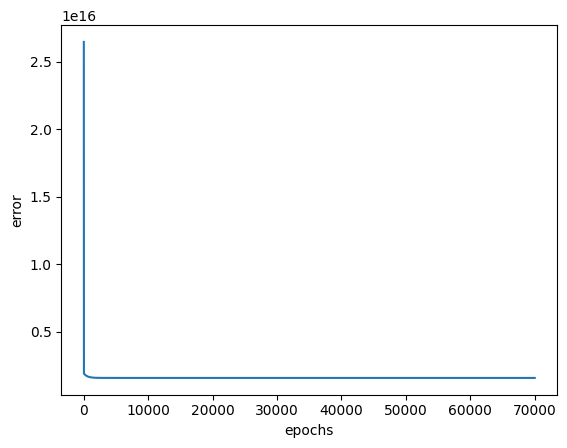

In [363]:
result = train_model(training_set["quality"].values ,training_set["price"].values, epochs=70000, learning_rate=0.02, print_every=5000)
plot_error_history(result[1])

In [364]:
reg = LinearRegression().fit(training_set["quality"].values.reshape(-1, 1), training_set["price"].values.reshape(-1, 1))

print("b0: ", reg.intercept_, " b1: ", reg.coef_)

b0:  [-96469.57131874]  b1:  [[45411.99877916]]


In [365]:
manual_betas = result[0][-1]
sklearn_betas = [reg.intercept_[0], reg.coef_[0][0]]

print("manual:", manual_betas, " sklearn:", sklearn_betas)


manual: [-96469.57131873  45411.99877916]  sklearn: [-96469.57131873982, 45411.998779159156]


(8849978298162.041, 8850041328185.941)

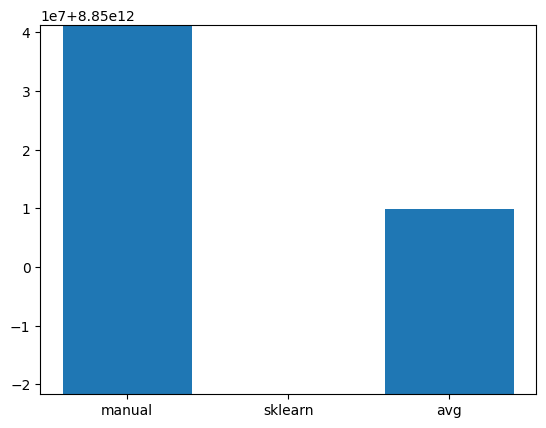

In [407]:
tests = test_models(manual_betas, sklearn_betas, testing_set["quality"].values)
errors = []
for k in tests:
    error = ((testing_set["quality"].values - tests[k]) ** 2).sum()
    errors.append(error)

plt.bar(tests.keys(), errors)
plt.ylim(min(errors), max(errors))
    

##### `rooms` vs `price`

#1000 => b0: 2771.0981, b1: 27431.8758, error: 2.883623E+15, error_change:-
#2000 => b0: 2093.7055, b1: 27530.3970, error: 2.883557E+15, error_change:-
#3000 => b0: 1709.7094, b1: 27586.2460, error: 2.883536E+15, error_change:-
#4000 => b0: 1492.0320, b1: 27617.9054, error: 2.883529E+15, error_change:-
#5000 => b0: 1368.6365, b1: 27635.8522, error: 2.883527E+15, error_change:-
#6000 => b0: 1298.6868, b1: 27646.0258, error: 2.883527E+15, error_change:-
#7000 => b0: 1259.0341, b1: 27651.7930, error: 2.883526E+15, error_change:-
#8000 => b0: 1236.5561, b1: 27655.0622, error: 2.883526E+15, error_change:-
#9000 => b0: 1223.8139, b1: 27656.9155, error: 2.883526E+15, error_change:-
#10000 => b0: 1216.5906, b1: 27657.9660, error: 2.883526E+15, error_change:-


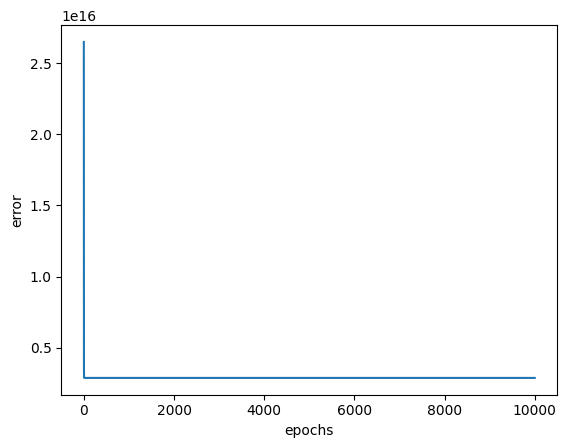

In [377]:
result = train_model(training_set["rooms"].values ,training_set["price"].values, epochs=10000, learning_rate=0.01, print_every=1000)
plot_error_history(result[1])

In [368]:
reg = LinearRegression().fit(training_set["rooms"].values.reshape(-1, 1), training_set["price"].values.reshape(-1, 1))

print("b0: ", reg.intercept_, " b1: ", reg.coef_)

b0:  [1207.13690883]  b1:  [[27659.34100204]]


In [369]:
manual_betas = result[0][-1]
sklearn_betas = [reg.intercept_[0], reg.coef_[0][0]]

print("manual:", manual_betas, " sklearn:", sklearn_betas)


manual: [ 1216.59063769 27657.96603555]  sklearn: [1207.1369088348292, 27659.341002043682]


[8850004151231.748, 8849941122442.15, 8849972636480.78]


(8849941122442.15, 8850004151231.748)

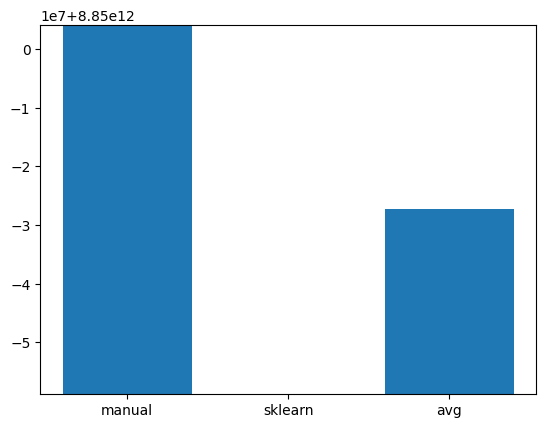

In [413]:
tests = test_models(manual_betas, sklearn_betas, testing_set["quality"].values)
errors = []
for k in tests:
    error = ((testing_set["rooms"].values - tests[k]) ** 2).sum()
    errors.append(error)

plt.bar(tests.keys(), errors)
plt.ylim(min(errors), max(errors))
    